- **Importing Libraries**

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

- **LOADING DATA**

In [109]:
#load the dataset
df = pd.read_csv(r"C:\Users\mnour\Desktop\weatherAUS.csv")

- **Exploratory data analysis**

In [110]:
#Show first 5 rows of the dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [111]:
#The shape of the dataset (Rows, Columns)
print(f"The Dimensions: {df.shape}")

The Dimensions: (145460, 23)


In [112]:
#number of numeric and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

cat_cols = df.select_dtypes(include=['object', 'category']).columns


print("#Num_cols:", len(num_cols))
print("#Cat_cols:", len(cat_cols))


#Num_cols: 16
#Cat_cols: 7


In [113]:
#show the column names in the dataset
print(df.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [114]:
#show a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Dataset Overview**
- About the dataset, The dataset contains 145,460 entries (rows) and 23 columns including the target which is "RainTomorrow" Indicates whether rainfall is expected on the following day.
  - Numerical Columns (float): 16
  - Categorical Columns (object): 7
  - Target Variable Data Type: Categorical (object)

**Notes to consider**
- There are missing values, so it should be handled appropriately.
- Categorical columns require encoding
- Numerical columns may require feature scaling

In [115]:
#show summary statistics for all numerical columns
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [116]:
#Check class balance in target (percentage)
df['RainTomorrow'].value_counts(normalize=True)*100

RainTomorrow
No     77.581878
Yes    22.418122
Name: proportion, dtype: float64

**we should apply smote to balance the dataset, but we will do it after data preprocessing**

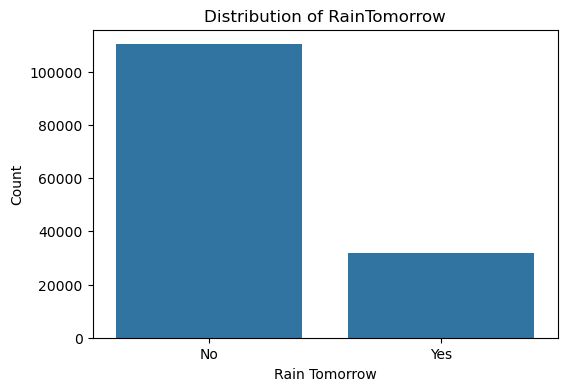

In [117]:
#Visualization of the target varible to detect class imbalance
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='RainTomorrow')
plt.title('Distribution of RainTomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.show()

- The visualization reveals that the dataset is imbalanced and this indicates that the majority of days in the dataset are recorded as non-rainy days.
- to address this imbalance, we will use technique like SMOTE.

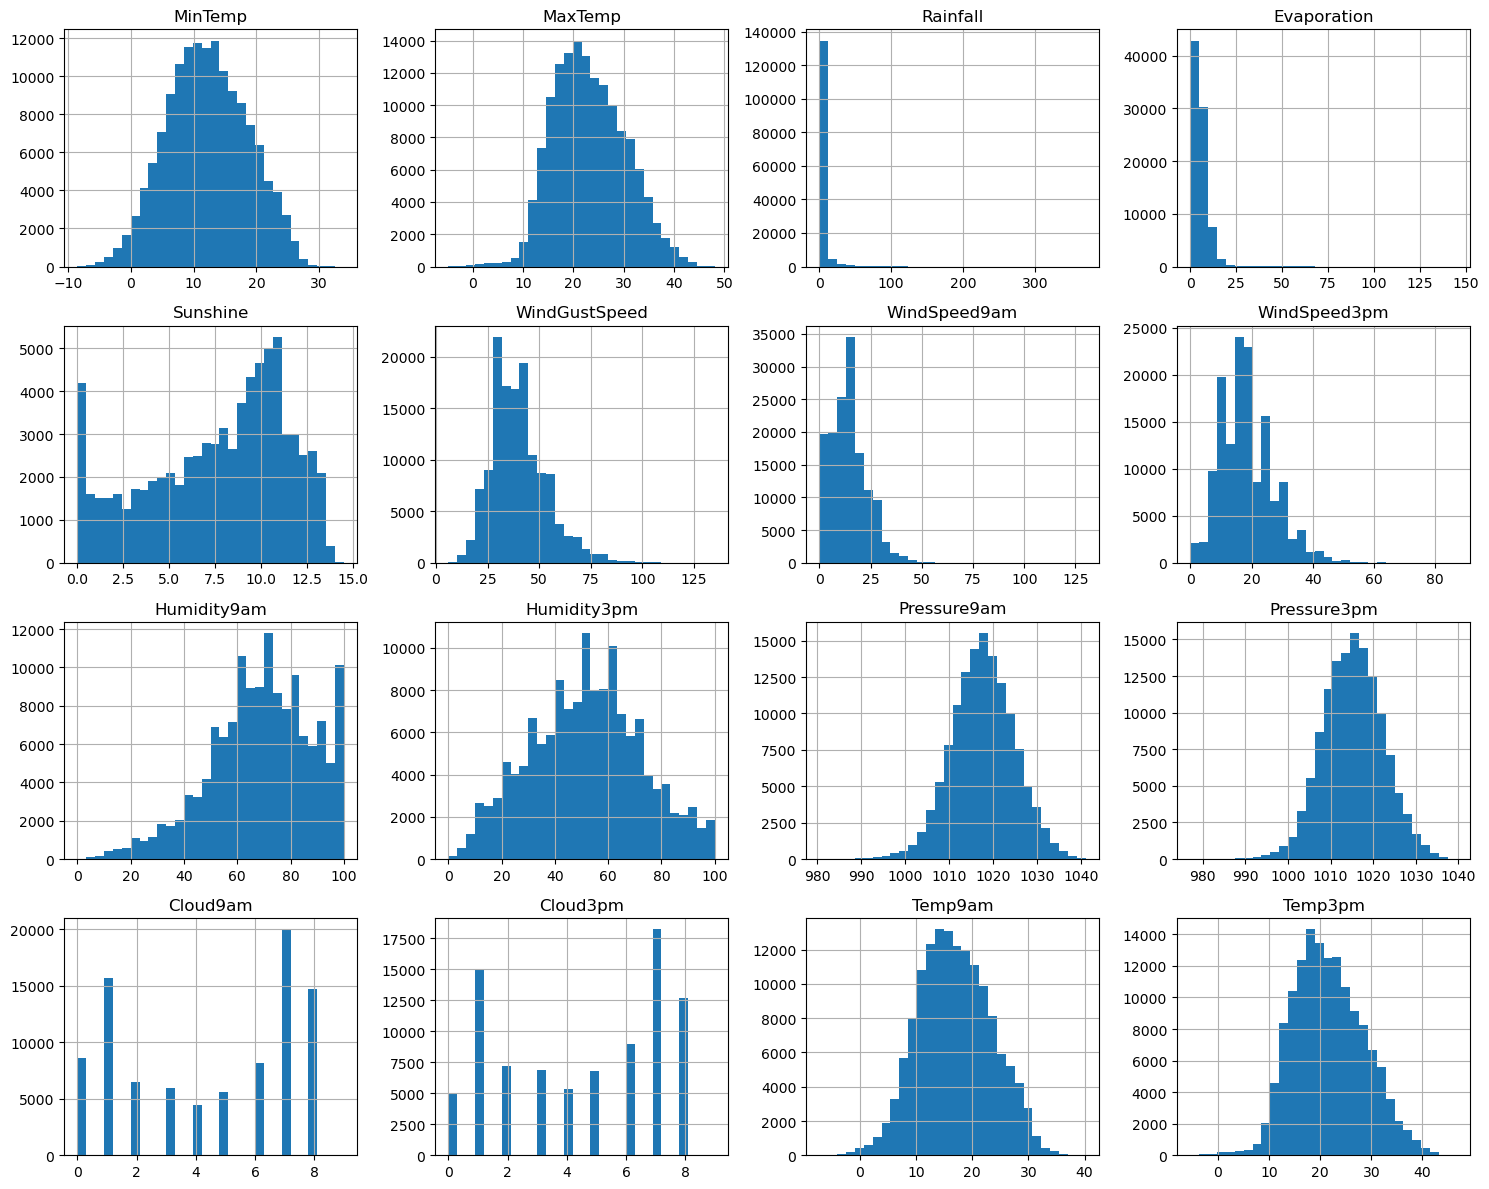

In [118]:
#Numerical Features Distribution
df.hist(figsize=(15,12), bins=30)
plt.tight_layout()
plt.show()

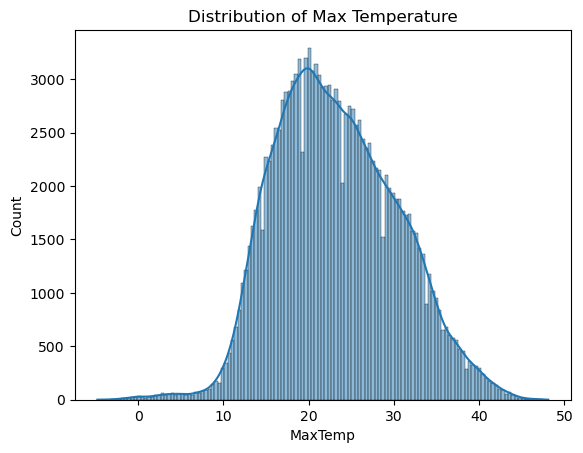

In [119]:
#Distribution of Max Temperature
sns.histplot(df["MaxTemp"], kde=True)
plt.title("Distribution of Max Temperature")
plt.show()


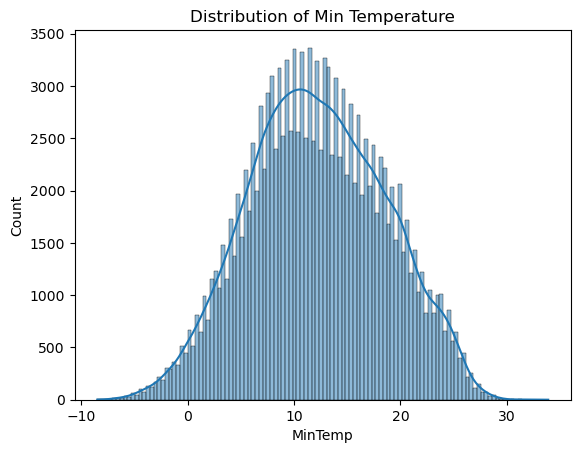

In [120]:
#Distribution of Min Temperature
sns.histplot(df["MinTemp"], kde=True)
plt.title("Distribution of Min Temperature")
plt.show()


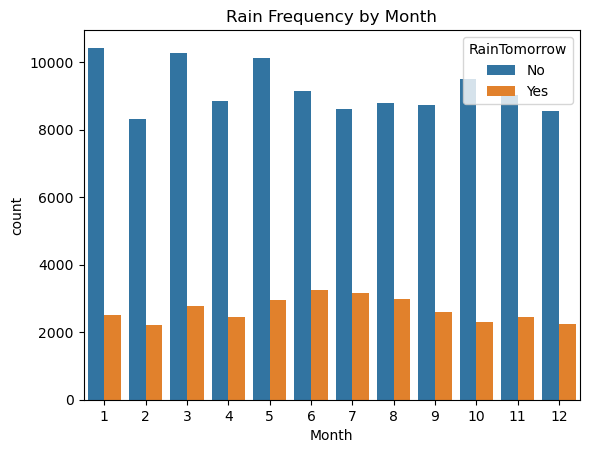

In [121]:
#
df["Month"] = pd.to_datetime(df["Date"]).dt.month

sns.countplot(x="Month", hue="RainTomorrow", data=df)
plt.title("Rain Frequency by Month")
plt.show()


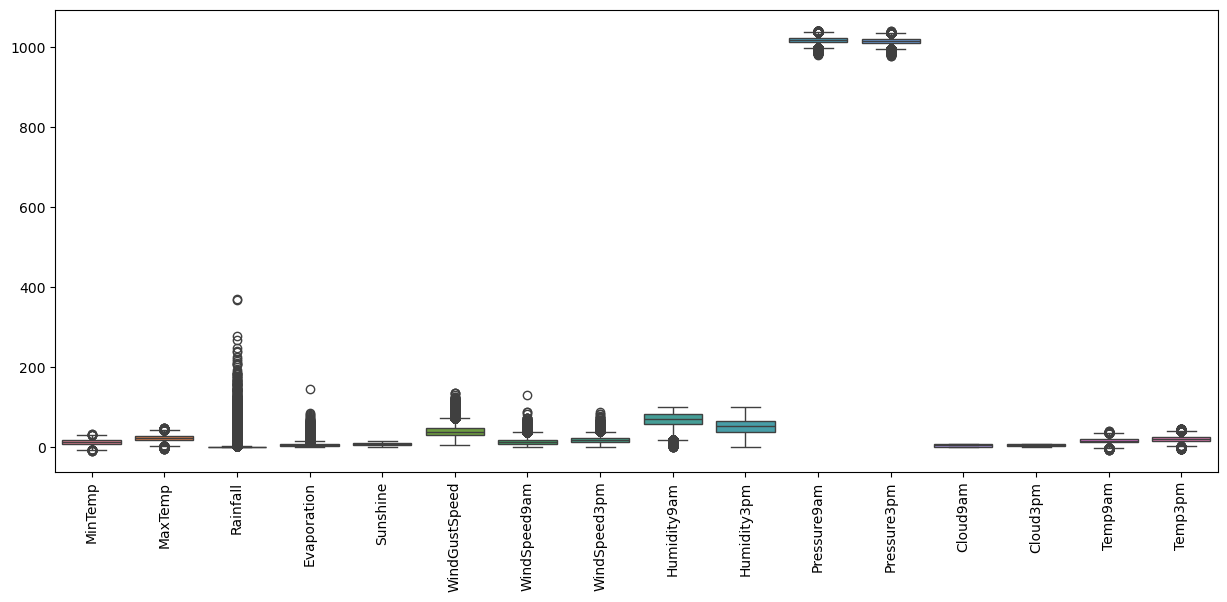

In [122]:
#Check outliers
num_cols=df.select_dtypes(include='float')
plt.figure(figsize=(15,6))
sns.boxplot(data=num_cols)
plt.xticks(rotation=90)
plt.show()

**Some notes on the boxplot for outlier detection:**
 - These columns have outliers: Rainfall, Humidity at 9am and 3pm, Temperature (MinTemp, MaxTemp, Temp9am, Temp3pm) ,Wind Gust, Speed columns, Pressure columns, Cloud columns.
 - Needs to be handled.

In [123]:
#number of outliers in each numerical column using IQR method
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
pd.DataFrame(outliers.to_frame().rename(columns={0:'Outliers'})).head(15) 



,Outliers
MinTemp,54
MaxTemp,489
Rainfall,25578
Evaporation,1995
Sunshine,0
WindGustSpeed,3092
WindSpeed9am,1817
WindSpeed3pm,2523
Humidity9am,1425
Humidity3pm,0


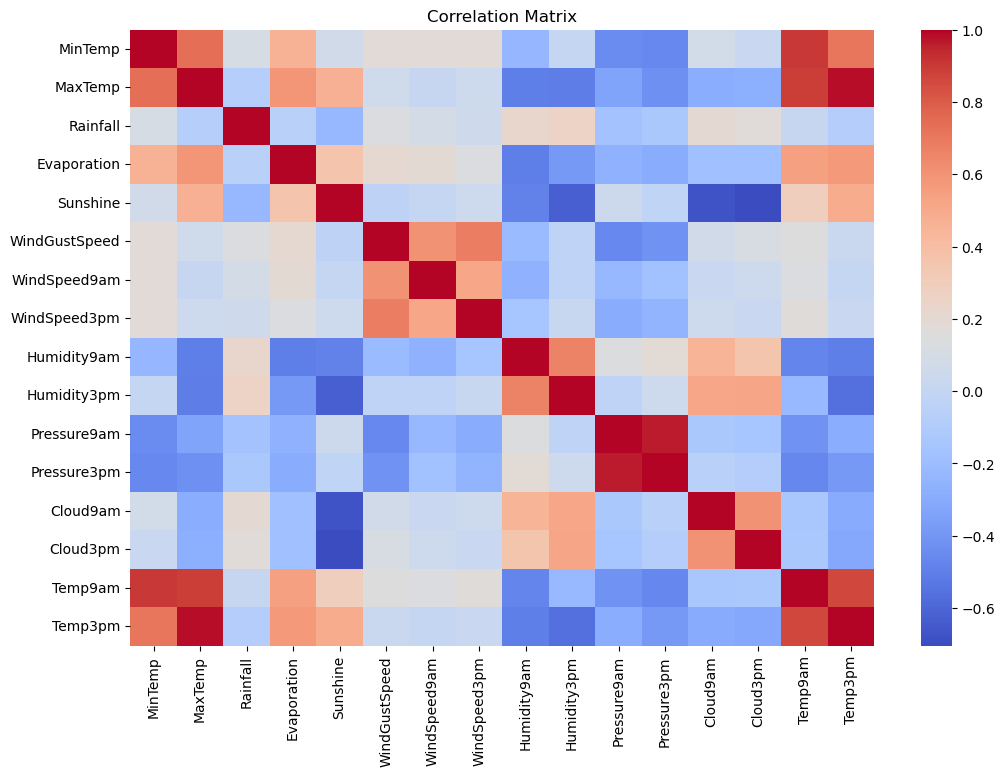

In [124]:
#Correlation between numerical columns
plt.figure(figsize=(12,8))
sns.heatmap(num_cols.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

In [125]:
#Show the categorical columns
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [126]:
#Categorical columns value counts
for col in cat_cols:
    print(f"{col} Distribution:")
    print(df[col].value_counts())
    print("----------------------")

Date Distribution:
Date
2017-06-24    49
2017-06-23    49
2017-06-22    49
2017-06-21    49
2017-06-20    49
              ..
2008-01-27     1
2008-01-28     1
2008-01-29     1
2008-01-30     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
----------------------
Location Distribution:
Location
Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Hobart              3193
Perth               3193
Melbourne           3193
Brisbane            3193
Albury              3040
MountGinini         3040
GoldCoast           3040
Wollongong          3040
MountGambier        3040
Launceston          3040
AliceSprings        3040
Albany              3040
Townsville          3040
Bendigo             3040
Cairns              3040
Ballarat            3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
PerthAirport        3009
Williamtown         3009
Cobar               3009
BadgerysCreek       3009
SydneyAirport      

In [127]:
df[cat_cols].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


**The categorical variables:**
  - Date column should be a DATE datatype.
  - RainToday and RainTomorrow are binary categorical variables

In [128]:
#Convert 'Date' datatype to DATE
df['Date'] = pd.to_datetime(df["Date"])
print(df['Date'].dtype)

datetime64[ns]


In [129]:
#Some feature engineering
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [130]:
df.drop(columns=['Date'], inplace=True)

In [131]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year,DayOfWeek
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,No,12,1,2008,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,No,12,2,2008,1
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,No,No,12,3,2008,2
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,No,No,12,4,2008,3
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,No,12,5,2008,4


In [132]:
#now categorical columns are
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


In [133]:
# Show the missing values of each column and which columns need imputation
pd.DataFrame(df.isnull().sum()).rename(columns={0:'Missing Values'}).head(15)

,Missing Values
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566
WindDir3pm,4228


In [134]:
num_cols=df.select_dtypes(include=[np.number]).columns
cat_cols=df.select_dtypes(exclude=[np.number]).columns
#Separate differant data types because it has different ways to full the null values

MICE is a method we used to fill missing values by modeling the relationship between the target column and other columns in the dataset.

In [135]:
mice_imputer=IterativeImputer(max_iter=10, random_state=42)
df[num_cols] =mice_imputer.fit_transform(df[num_cols])

In [136]:
#Additional features were engineered to capture weather dynamics.
#Temperature range was created to represent daily instability,
#average humidity to reflect overall moisture levels,
#and pressure change to indicate atmospheric variation,
#which are strong indicators of rainfall.

df["TempRange"] = df["MaxTemp"] - df["MinTemp"]
df["AvgHumidity"] = (df["Humidity9am"] + df["Humidity3pm"]) / 2
df["PressureChange"] = df["Pressure3pm"] - df["Pressure9am"]

def get_season(month):
    if month in [12,1,2]:
        return "Summer"
    elif month in [3,4,5]:
        return "Autumn"
    elif month in [6,7,8]:
        return "Winter"
    else:
        return "Spring"

df["Season"] = df["Month"].apply(get_season)


In [137]:
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Location,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5,14.6,14.3,7.7,9.7,13.1,13.4,15.9,15.9,12.6,8.4
MaxTemp,22.9,25.1,25.7,28.0,32.3,29.7,25.0,26.7,31.9,30.1,30.4,21.7,18.6,21.0,24.6
Rainfall,0.6,0.0,0.0,0.0,1.0,0.2,0.0,0.0,0.0,1.4,0.0,2.2,15.6,3.6,0.0
Evaporation,6.517871,6.422291,8.656674,6.796142,7.414099,7.850421,7.760498,6.864031,9.208593,7.852615,8.20155,3.055274,4.25829,5.730561,6.410969
Sunshine,7.305227,11.202681,12.070446,11.917141,5.972191,10.590696,11.944422,11.764788,11.790615,11.171295,11.010475,1.854133,2.151955,5.925055,10.849795
WindGustDir,W,WNW,WSW,NE,W,WNW,W,W,NNW,W,N,NNE,W,SW,NaN
WindGustSpeed,44.0,44.0,46.0,24.0,41.0,56.0,50.0,35.0,80.0,28.0,30.0,31.0,61.0,44.0,48.210224
WindDir9am,W,NNW,W,SE,ENE,W,SW,SSE,SE,S,SSE,NE,NNW,W,S
WindDir3pm,WNW,WSW,WSW,E,NW,W,W,W,NW,SSE,ESE,ENE,NNW,SSW,WNW


To fill the categorical columns, we grouped the data based on the location.
Then we used transform() to ensure that the output has the same number of rows as the original dataset.
This allows us to fill the missing values without summarizing the data and keeps the column in its original structure.

In [138]:
for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    df[col] = df.groupby('Location')[col].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
    )

In [139]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainToday,RainTomorrow,Month,Day,Year,DayOfWeek,TempRange,AvgHumidity,PressureChange,Season
0,Albury,13.4,22.9,0.6,6.517871,7.305227,W,44.0,W,WNW,...,No,No,12.0,1.0,2008.0,0.0,9.5,46.5,-0.6,Summer
1,Albury,7.4,25.1,0.0,6.422291,11.202681,WNW,44.0,NNW,WSW,...,No,No,12.0,2.0,2008.0,1.0,17.7,34.5,-2.8,Summer
2,Albury,12.9,25.7,0.0,8.656674,12.070446,WSW,46.0,W,WSW,...,No,No,12.0,3.0,2008.0,2.0,12.8,34.0,1.1,Summer
3,Albury,9.2,28.0,0.0,6.796142,11.917141,NE,24.0,SE,E,...,No,No,12.0,4.0,2008.0,3.0,18.8,30.5,-4.8,Summer
4,Albury,17.5,32.3,1.0,7.414099,5.972191,W,41.0,ENE,NW,...,No,No,12.0,5.0,2008.0,4.0,14.8,57.5,-4.8,Summer


We handle outliers by calculating Q1 and Q3, computing the lower and upper bounds, and replacing any values outside these bounds with the nearest bound.

In [140]:
def handle_outliers(data, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound,
                 np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df
    for col in ['Rainfall', 'Evaporation', 'WindGustSpeed']:
        df= handle_outliers(data, col)

In [141]:
#IQR Method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
print(outliers)

MinTemp             64
MaxTemp            548
Rainfall         27858
Evaporation       3432
Sunshine             8
WindGustSpeed     3160
WindSpeed9am      1821
WindSpeed3pm      2533
Humidity9am       1431
Humidity3pm          4
Pressure9am       2578
Pressure3pm       1973
Cloud9am             0
Cloud3pm             1
Temp9am            340
Temp3pm            875
Month                0
Day                  0
Year                 0
DayOfWeek            0
dtype: int64


In [142]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainToday,RainTomorrow,Month,Day,Year,DayOfWeek,TempRange,AvgHumidity,PressureChange,Season
0,Albury,13.4,22.9,0.6,6.517871,7.305227,W,44.0,W,WNW,...,No,No,12.0,1.0,2008.0,0.0,9.5,46.5,-0.6,Summer
1,Albury,7.4,25.1,0.0,6.422291,11.202681,WNW,44.0,NNW,WSW,...,No,No,12.0,2.0,2008.0,1.0,17.7,34.5,-2.8,Summer
2,Albury,12.9,25.7,0.0,8.656674,12.070446,WSW,46.0,W,WSW,...,No,No,12.0,3.0,2008.0,2.0,12.8,34.0,1.1,Summer
3,Albury,9.2,28.0,0.0,6.796142,11.917141,NE,24.0,SE,E,...,No,No,12.0,4.0,2008.0,3.0,18.8,30.5,-4.8,Summer
4,Albury,17.5,32.3,1.0,7.414099,5.972191,W,41.0,ENE,NW,...,No,No,12.0,5.0,2008.0,4.0,14.8,57.5,-4.8,Summer


first we used Log Transformation on Rainfall:
We applied np.log1p to the Rainfall column to reduce skewness caused by very large values.
This helps the model learn better without removing any data.
secand Date Feature Engineering:
We converted the Date column to datetime format and extracted Month and Year as new features.
This allows the model to capture seasonal and yearly patterns in the data.
theird Temperature Range Feature:
We created a new column TempRange by subtracting MinTemp from MaxTemp.
This feature captures daily temperature variation, which may be important for predicting weather patterns.

In [143]:
df['Rainfall'] = np.log1p(df['Rainfall'])
df['TempRange'] = df['MaxTemp'] - df['MinTemp']

In [144]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainToday,RainTomorrow,Month,Day,Year,DayOfWeek,TempRange,AvgHumidity,PressureChange,Season
0,Albury,13.4,22.9,0.470004,6.517871,7.305227,W,44.0,W,WNW,...,No,No,12.0,1.0,2008.0,0.0,9.5,46.5,-0.6,Summer
1,Albury,7.4,25.1,0.000000,6.422291,11.202681,WNW,44.0,NNW,WSW,...,No,No,12.0,2.0,2008.0,1.0,17.7,34.5,-2.8,Summer
2,Albury,12.9,25.7,0.000000,8.656674,12.070446,WSW,46.0,W,WSW,...,No,No,12.0,3.0,2008.0,2.0,12.8,34.0,1.1,Summer
3,Albury,9.2,28.0,0.000000,6.796142,11.917141,NE,24.0,SE,E,...,No,No,12.0,4.0,2008.0,3.0,18.8,30.5,-4.8,Summer
4,Albury,17.5,32.3,0.693147,7.414099,5.972191,W,41.0,ENE,NW,...,No,No,12.0,5.0,2008.0,4.0,14.8,57.5,-4.8,Summer


In [145]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud3pm,Temp9am,Temp3pm,Month,Day,Year,DayOfWeek,TempRange,AvgHumidity,PressureChange
count,145460.000000,145460.000000,145227.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,...,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.198642,23.222104,0.502869,5.103495,7.402042,39.805276,14.041841,18.655179,68.955635,51.619590,...,4.496206,16.965116,21.709854,6.399615,15.712258,2012.769751,2.999684,11.023462,60.287613,-2.395674
std,6.380311,7.097643,0.911379,3.705210,3.479566,13.493201,8.875501,8.751183,18.991696,20.722232,...,2.362167,6.491085,6.957320,3.427262,8.794789,2.537684,1.999292,4.937037,18.157896,1.901946
min,-10.087463,-4.800000,-4.047665,-5.135640,-3.773954,6.000000,-2.185325,0.000000,-93.980204,-71.579757,...,-3.754007,-7.200000,-5.400000,1.000000,1.000000,2007.000000,0.000000,-2.039392,-82.779980,-16.700000
25%,7.600000,18.000000,0.000000,2.600000,4.933112,31.000000,7.000000,13.000000,57.000000,37.000000,...,2.674984,12.300000,16.700000,3.000000,8.000000,2011.000000,1.000000,7.200000,49.000000,-3.600000
50%,12.000000,22.700000,0.000000,4.610802,7.700000,39.000000,13.000000,19.000000,70.000000,52.000000,...,4.631759,16.700000,21.129238,6.000000,16.000000,2013.000000,3.000000,10.500000,61.500000,-2.600000
75%,16.800000,28.200000,0.587787,6.826789,10.131664,48.000000,19.000000,24.000000,83.000000,66.000000,...,6.928131,21.500000,26.400000,9.000000,23.000000,2015.000000,5.000000,14.400000,73.000000,-1.400000
max,33.900000,48.100000,5.918894,145.000000,21.857171,136.581647,130.000000,87.000000,115.166170,101.710497,...,11.988430,40.200000,46.700000,12.000000,31.000000,2017.000000,6.000000,31.200000,107.583085,10.800000


In [146]:
skewness_dict = {}
def calculate_skewness(df):

    for col in df.select_dtypes(include=['number']).columns:
        skewness = df[col].skew()
        skewness_dict[col] = skewness
    return skewness_dict
skewness_values = calculate_skewness(df)

for key, value in skewness_values.items():
    print(f"{key}: {value}")

MinTemp: 0.019285580049466365
MaxTemp: 0.22084790345169764
Rainfall: 1.939372055405854
Evaporation: 3.2651013581933643
Sunshine: -0.29069012860816784
WindGustSpeed: 0.8840287165284505
WindSpeed9am: 0.7806002233496788
WindSpeed3pm: 0.6366251283422747
Humidity9am: -0.49127348096821777
Humidity3pm: 0.02114375746738066
Pressure9am: -0.13086133998743232
Pressure3pm: -0.07832413314671027
Cloud9am: -0.18183410583034362
Cloud3pm: -0.14459364796667284
Temp9am: 0.07735323718919797
Temp3pm: 0.2252485987414814
Month: 0.030342867107304414
Day: 0.00904008217607442
Year: -0.0493566689296842
DayOfWeek: 0.0008065975899292629
TempRange: 0.4665379040585384
AvgHumidity: -0.3467353486187753
PressureChange: 0.6144062483711891


In [147]:
# Features that have absolute skewness > 1 do for it Log tranformation 
for i in skewness_dict:
    if abs(skewness_dict[i]) > 1:
        df[i] = np.log1p(df[i]) 
        print(f"{i} : {skewness_dict[i]}")


Rainfall : 1.939372055405854
Evaporation : 3.2651013581933643


- **Features Encoding**

In [148]:
#Replace the binary columns values to 0/1
binary_cols = ['RainToday', 'RainTomorrow']

for col in binary_cols:
    df[col] = df[col].astype(str).str.strip().str.title()
    
df = df[df['RainTomorrow'].isin(['Yes', 'No'])]

df['RainToday'] = df['RainToday'].replace('Nan', None)
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0}).astype(int)

In [149]:
pd.DataFrame(df['RainTomorrow'].value_counts())

,count
RainTomorrow,
0,110316
1,31877


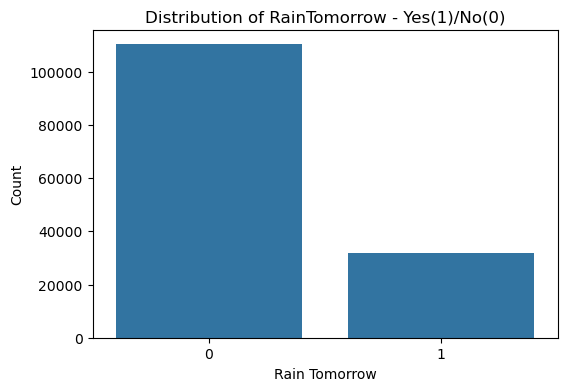

In [150]:
#Show the imbalanced dataset after replacing the target into 0/1
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='RainTomorrow')
plt.title('Distribution of RainTomorrow - Yes(1)/No(0)')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.show()

In [151]:
df.dtypes

Location           object
MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
WindGustDir        object
WindGustSpeed     float64
WindDir9am         object
WindDir3pm         object
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am       float64
Pressure3pm       float64
Cloud9am          float64
Cloud3pm          float64
Temp9am           float64
Temp3pm           float64
RainToday           int64
RainTomorrow        int64
Month             float64
Day               float64
Year              float64
DayOfWeek         float64
TempRange         float64
AvgHumidity       float64
PressureChange    float64
Season             object
dtype: object

In [152]:
df.Location.value_counts()

Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
Newcastle           2955
SalmonGums          2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek   

In [153]:
#apply one-hot encode on the nominal columns

In [154]:
nominal_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Season']

for col in nominal_cols:
    df[col] = df[col].fillna('Missing')    

In [155]:
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True, dtype=int)
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(0) 

In [156]:
#Apply One-hot encoding on nominal variables
#df = pd.get_dummies(df, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], drop_first=True).astype(int)

In [157]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Season_Spring,Season_Summer,Season_Winter
0,13.4,22.9,0.385265,2.017283,7.305227,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,1,0,0,1,0
1,7.4,25.1,0.000000,2.004488,11.202681,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,1,0,1,0
2,12.9,25.7,0.000000,2.267649,12.070446,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,1,0,1,0
3,9.2,28.0,0.000000,2.053629,11.917141,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,1,0
4,17.5,32.3,0.526589,2.129909,5.972191,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,1,0


- **Feature Scaling**

In [158]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('RainTomorrow',errors='ignore')

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [159]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Season_Spring,Season_Summer,Season_Winter
0,0.189441,-0.046100,0.241024,0.587993,-0.031490,0.314223,0.676692,0.613263,0.109327,-1.424179,...,-0.303334,-0.263259,-0.245744,-0.264204,-0.277017,3.927010,-0.265952,-0.567191,1.775076,-0.581484
1,-0.748192,0.263132,-0.612181,0.568360,1.087738,0.314223,-1.128207,0.384829,-1.308321,-1.279609,...,-0.303334,-0.263259,-0.245744,-0.264204,-0.277017,-0.254647,3.760078,-0.567191,1.775076,-0.581484
2,0.111305,0.347468,-0.612181,0.972167,1.336934,0.462404,0.563886,0.841696,-1.623354,-1.038657,...,-0.303334,-0.263259,-0.245744,-0.264204,-0.277017,-0.254647,3.760078,-0.567191,1.775076,-0.581484
3,-0.466902,0.670757,-0.612181,0.643764,1.292909,-1.167580,-0.338564,-1.099989,-1.255816,-1.713321,...,-0.303334,-0.263259,-0.245744,-0.264204,-0.277017,-0.254647,-0.265952,-0.567191,1.775076,-0.581484
4,0.830156,1.275165,0.554000,0.760812,-0.414297,0.091953,-0.789789,0.156396,0.686887,-0.894086,...,-0.303334,-0.263259,-0.245744,-0.264204,-0.277017,-0.254647,-0.265952,-0.567191,1.775076,-0.581484


In [160]:
#we will use SMOTE to handle the imbalanced dataset
#SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique for handling imbalanced datasets.
#It works by creating synthetic samples of the minority class to balance the class distribution.
#This can help improve the performance of machine learning models trained on the dataset.
#SMOTE is applied after splitting the dataset into training and testing sets to prevent data leakage and ensure that the model is evaluated on unseen data.
import imblearn
from imblearn.over_sampling import SMOTE
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Original class distribution:")
print(pd.DataFrame(y_train.value_counts()))
print("\nResampled class distribution:")
print(pd.DataFrame(y_train_resampled.value_counts()))

Original class distribution:
              count
RainTomorrow       
0             88252
1             25502

Resampled class distribution:
              count
RainTomorrow       
0             88252
1             88252
